#PROJECT: Spot the Mask Challenge





developed by Amenallah SALEM: amenallah.salem@dauphine.tn 



# project description


The objective of this project is to create an image classification Deep learning model to accurately predict the likelihood that an image contains a person wearing a face mask, or not. We will make use of the following dataset, wich contains 1,800+ images of people either wearing masks or not.



Also this project is an evaluation task for Asvanced Deep learning For images in the of Paris-Dauphine university


## project steps & sections:

**First section(Importing necessary packages & environement setup)**

In the first section we will be importing necessary packages and mounting our drive to the dataset path 

**Second section(importing and visualizing data)**

we will importe our dataset from google drive, check houw many image we have as well as how many images ectantion we have. Then we check if we have duplicated images and / or missing/broken images. if it is the case we will remove theise duplications. The second phase is to get our labels and images  into pandas dataframe . Finally plot some images with their classes distribution to know better ur dataset.

**Third section(Data preparation & pre-processing)**

from the first look to the dataset we remark that there is some images that does not have the same size. so we do some visualisation to see the distribution of the hight & width of images shape based on median, quartiles and outliers( images with too hoght resolution)

the second step now is to split dataset into test & train data
and then Encode Labels and Normalize them


**Fourth section(Build a model "from scratch":)**

In this part we create a basic model made of a convolutional bloc. Compile your model (use SGD optimizer and choose a relevant loss and metric). Fit your model. Finally we plot our loss and metrics to evaluate our model.


**Fifth section(Evaluating a model based on transfer learning)**

implement the following modele by transfert lerning 

VGG19

INCEPTION V3

InceptionResNetV2

RESNET50

Xception

**six section(Conclusion & link to github)**

From what we experemented we chose to save our best model weights.

you can find the project also in my github page:



# Importing necessary packages & environement setup

In [0]:
import numpy as np 
import pandas as pd 
#data visualisation librarys
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

#tensorflow
%tensorflow_version 2.x
import tensorflow as tf 
from tensorflow.keras import layers , Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.metrics import TruePositives, FalsePositives,TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC

from tensorflow.keras.layers import Dense , Activation 
from tensorflow.keras.layers import Dropout , GlobalAveragePooling2D 

from tensorflow.keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop , Adadelta , Adam
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.image as mpimg 

from tqdm import tqdm  
import cv2
import skimage
from skimage.transform import resize
from random import shuffle

In [2]:
#Go to the images path 
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/Dauphine_Projet_Image2020

/content/drive/My Drive/Dauphine_Projet_Image2020


# importing and visualizing data 


In [4]:
#we import our data from google drive and dispay contents 
data_PATH='/content/drive/My Drive/Dauphine_Projet_Image2020/'
import os
for dirname, _, filenames in os.walk(data_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        #pass
#As we can see we find images with .jpg & .jpeg extention in our dataset

/content/drive/My Drive/Dauphine_Projet_Image2020/tldspzpkenscsjyokedqawzuqdbjfh.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/ithkkmgmiihhewlqiycznvepzxxaoh.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/lkzjcblzskcxgdzssgiasoddrrtouf.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/afolbmlyqayubtqtlsqdafbvzreajk.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/mdwgptlsdcgkglflwsqseheibugref.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/mxpvljalhmabtlrogfacucyagvrpzc.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/xxtbbtxrmahmoenymorwiwzqexskaz.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/twuombcbchukiltgyoxxovvpqidulj.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/hguumdaaqstpcffrlexqqlngjimmdo.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/yyjdtnkxdhpuycghpnzxtwxfctxljf.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/xklxzfuxkxgykpuhuzzaldbdjhcydx.jpg
/content/drive/My Drive/Dauphine_Projet_Image2020/xrljzwedeqovuyt

In [5]:
#checking houw many image extentions we have 
def displays_images_extentions(data_path):
  images_extention=[]
  for image_name in os.listdir(data_path):
    #walk throught all the images in dataset and extract the extention
    images_extention.append(image_name.split('.')[-1])
  #convert the list of images_extention to set to remove duplications 
  images_extention=set(images_extention)
  print("we have the following images_extention in the dataset:")
  return images_extention
  
displays_images_extentions(data_PATH)
#we have 4 images extentions 

we have the following images_extention in the dataset:


{'JPG', 'csv', 'jpeg', 'jpg', 'png'}

In [6]:
def get_labels(labels_path):
  df_=pd.read_csv(labels_path)
  return df_

df=get_labels(data_PATH + 'train_labels.csv')
df

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1
...,...,...
1303,hxjwafskxmlfaotwaklzuwuccsbxfu.jpg,0
1304,oyodauphffgmzmvqlykcfvmyxartok.jpg,1
1305,uppvtemhkneqggtbfubeccqjvyefiw.png,1
1306,mzjjvzkzvqmyukzsegtoktaslejcdz.jpg,0


data contain 2 classes with shape of our data is (1308, 2).


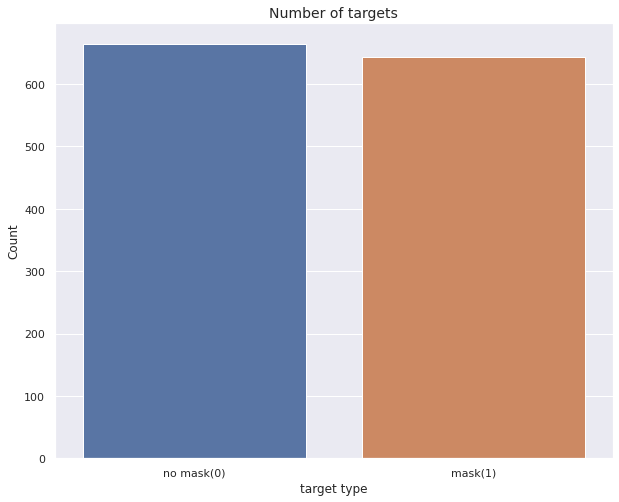

In [7]:
#we now define a function to see how many samples for each class are there in the dataset?
def check_for_data_equilibration(df_):

  # Get the counts for each class
  target_count = df_['target'].value_counts()
  print('data contain {} classes with shape of our data is {}.'.format(df_.shape[1], df_.shape))#, len(set(np.array(df['target']))), target_count.index, target_count.index))


  # Plot the results 
  plt.figure(figsize=(10,8))
  sns.barplot(x=target_count.index, y= target_count.values)
  plt.title('Number of targets', fontsize=14)
  plt.xlabel('target type', fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks(range(len(target_count.index)), ['no mask(0)', 'mask(1)'])
  plt.show()



sns.set()

check_for_data_equilibration(df)

In [8]:
#check if we have missing data 
#this means even with broken/missed image or unlabeled one (one that exist in the images set but 
# do no exist in the csv file)
def data_checking():
  #put my images from the data_Path into a list 
  images_list = os.listdir(data_PATH)
  # take all images name from the csv file and put them into a list 
  train_labels_list = df['image'].tolist()
  #our main test
  test_labels_list = [label for label in images_list if label not in train_labels_list]
  if len(test_labels_list) == len(images_list) - len(train_labels_list):
    print('no missing data')
  else:
    print('there is some missing data')

data_checking() 

no missing data


In [9]:
#check if we have duplicated images , 
#if so plot the duplicated images and remove them 
#if not pass 

def duplication_check(df_):
  #if we have duplicated images 
  if df_['image'].duplicated().any()==True:
    #show me the lines in tha dataFrame & delete them
    df_.loc[df_['image'].duplicated(keep =False), :]
    action='we have deleted the following duplications '
  else:
    action='there is no duplicated images'
    #pass
  return action

duplication_check(df)

'there is no duplicated images'

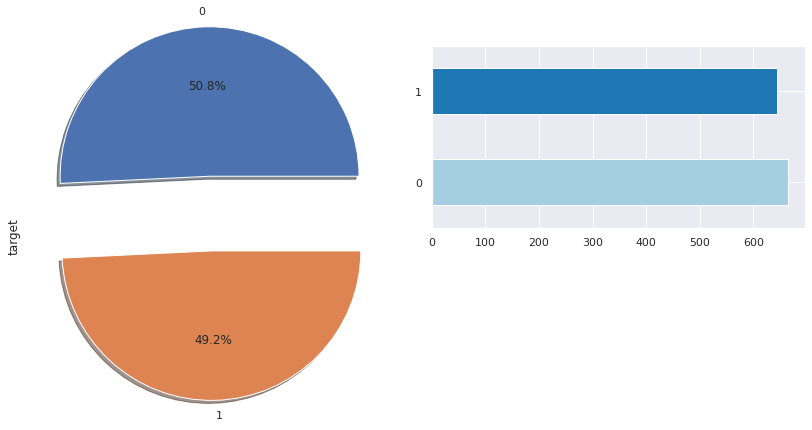

In [10]:
def plot_target_distribution():
  f = plt.subplots(1,2, figsize=(20,10))
  gridsize = (4, 4)
  ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=4)
  df['target'].value_counts().plot.pie(explode=[0.4,0.1],shadow=True, autopct="%1.1f%%")

  ax2 = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=2)

  df['target'].value_counts().plot(kind='barh',color=plt.cm.Paired(np.arange(len(df['target']))) ,figsize=(14,7))
  



  
plot_target_distribution()

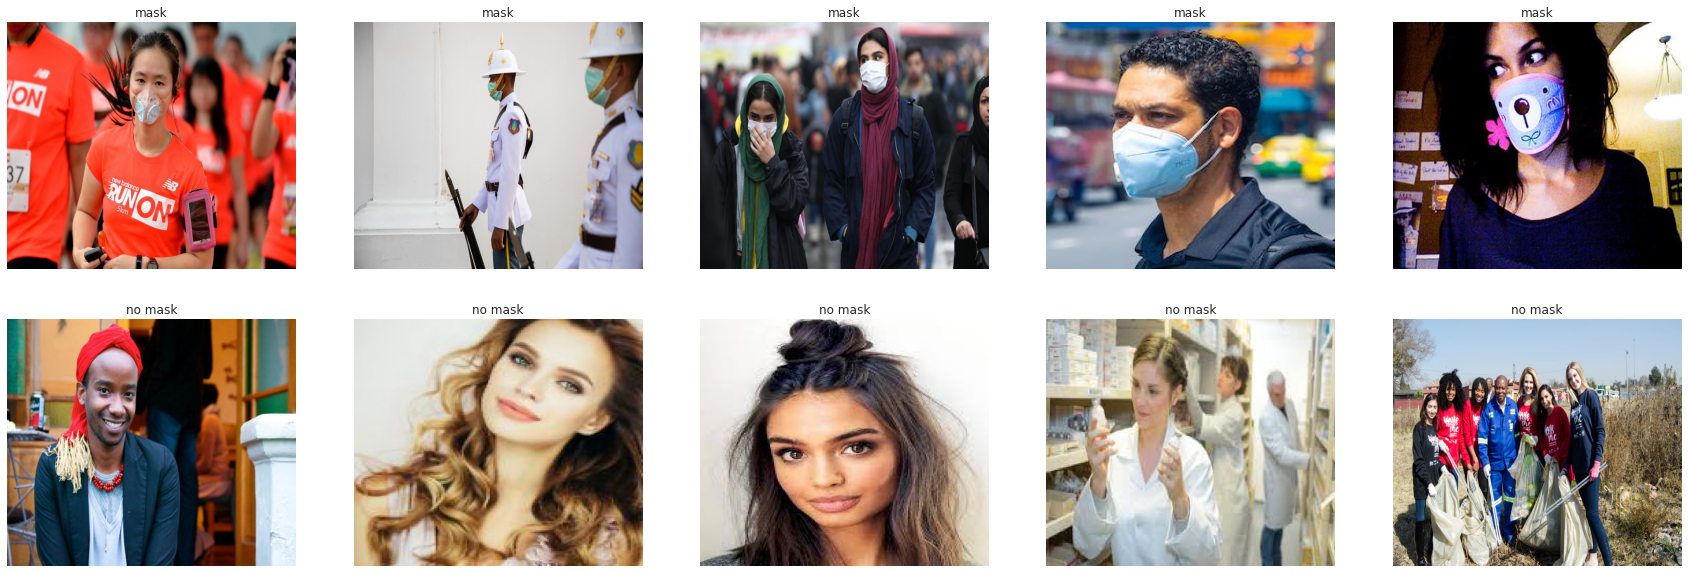

In [11]:
from skimage.io import imread

def plot_imges(df_):

  # Get few samples for both the classes
  mask_samples = (df_[df_['target']==1]['image'].iloc[:5]).tolist()
  nomask_samples = (df_[df_['target']==0]['image'].iloc[:5]).tolist()

  # Concat the data in a single list and del the above two list
  samples = mask_samples + nomask_samples
  del mask_samples, nomask_samples

  # Plot the data 
  f, ax = plt.subplots(2,5, figsize=(30,10))
  for i in range(10):
      img = imread(samples[i])
      ax[i//5, i%5].imshow(img, cmap='gray')
      if i<5:
          ax[i//5, i%5].set_title("mask")
      else:
          ax[i//5, i%5].set_title("no mask")
      ax[i//5, i%5].axis('off')
      ax[i//5, i%5].set_aspect('auto')
  plt.show()
  


plot_imges(df)

# Data preparation & pre-processing

In [12]:
#the images does not have the same size. to see that 
#let's look at the shape of first 10 images

def check_equilibred_image_sizes(images_path,df_):
  i=0
  while i<=df_.shape[0]:

    img_i = mpimg.imread(images_path +df_['image'][i])
    img_iPlus1 = mpimg.imread(images_path +df_['image'][i+1])
    if img_i.shape==img_iPlus1.shape:

      i+=1
      if i > df_.shape[0]:
        print('all images have the same data')
      break
      
    else:
      print('the images does not have the same size, for example here is the shape of the first 10 imgaes in the dataset')
      for i in range(10):
        img = mpimg.imread(images_path +df_['image'][i])
        print(img.shape)
      break


check_equilibred_image_sizes(data_PATH,df)


the images does not have the same size, for example here is the shape of the first 10 imgaes in the dataset
(411, 600, 3)
(531, 800, 3)
(166, 166, 3)
(239, 211, 3)
(1000, 1500, 3)
(183, 275, 3)
(800, 1200, 3)
(500, 800, 3)
(482, 593, 3)
(500, 750, 3)


In [13]:
#we now want to see too high or too small picture sizes 
#let's explaine a littele bit of our approach
# with visualizing distribution of images shape based on median,
# quartiles and outliers( images with too hoght resolution)


#Reamrk: this takes too much time (too expensive in terms of excution time)
#to search later for faster solution 

def add_size(df_):
    # add a size column to df of every image 
  df_['size'] = df_['image'].apply(lambda x:cv2.imread(data_PATH+x).shape)
  #df -----> image 	                           target 	size
      # 0    tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg 	0 	(411, 600, 3)
      # 1    rxgismgsvmaayzjarbfjaljhqmpbrt.jpg 	1 	(531, 800, 3)
  return df_

add_size(df)



,image,target,size
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0,"(411, 600, 3)"
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1,"(531, 800, 3)"
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0,"(166, 166, 3)"
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0,"(239, 211, 3)"
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1,"(1000, 1500, 3)"
...,...,...,...
1303,hxjwafskxmlfaotwaklzuwuccsbxfu.jpg,0,"(183, 275, 3)"
1304,oyodauphffgmzmvqlykcfvmyxartok.jpg,1,"(225, 225, 3)"
1305,uppvtemhkneqggtbfubeccqjvyefiw.png,1,"(313, 474, 3)"
1306,mzjjvzkzvqmyukzsegtoktaslejcdz.jpg,0,"(194, 259, 3)"


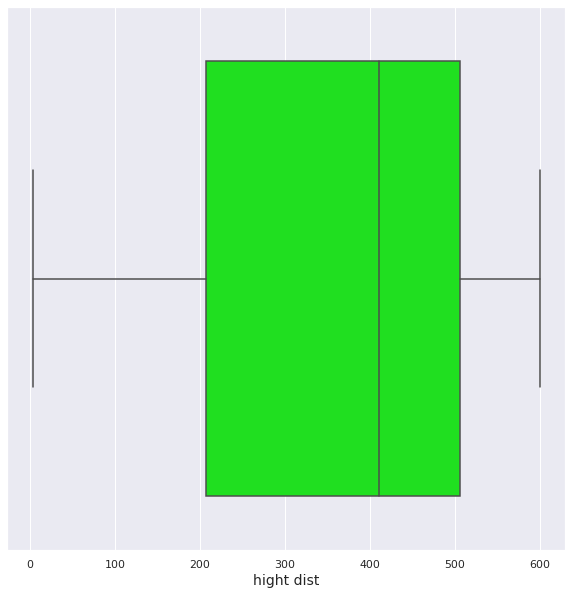

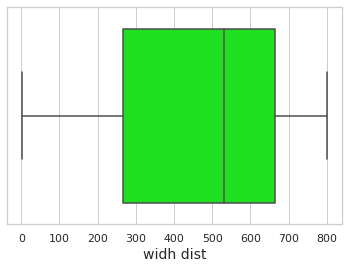

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f483c1037f0>)

In [14]:
#resizing images preparation
def show_me_images_shape_distribution(df_):
  f1, ax1 = plt.subplots(1, figsize=(10,10))
  # f = plt.subplots(1,2, figsize=(20,10))
  # gridsize = (4, 4)
  sns.set(style="whitegrid")
  sns.boxplot(x=df_['size'][0],color='lime')
  plt.xlabel('hight dist', fontsize=14)
  plt.show()
  sns.boxplot(x=df_['size'][1],color='lime')
  plt.xlabel('widh dist', fontsize=14)
  plt.show()
  return f1, ax1

show_me_images_shape_distribution(df)

In [15]:

#see the mean of the height and the widh of the images 

size_meanHight=np.mean(df['size'].apply(lambda x:x[0])) #.tolist()
size_meanwight=np.mean(df['size'].apply(lambda x:x[1]))
size_meanHight, size_meanwight

(448.04587155963304, 626.0741590214067)

In [0]:
def resize_images(list_of_images):
#Returns resized images 256x256 

#Remark: we shosen to resize the images to (256,256)so we can perform better 
#the transfert learning to them 

  X_train = []
  #NROWS=450 ; NCOLS=630   #sizes=(256,256)
  for label in list_of_images:
    X_train.append(cv2.resize(cv2.cvtColor(cv2.imread(data_PATH+label), cv2.COLOR_BGR2RGB), (256,256),interpolation=cv2.INTER_CUBIC))
    #image = tf.image.resize(cv2.imread( data_PATH + label), sizes)
    #X_train.append(image)
  return X_train

X_train = resize_images(df['image'].tolist())

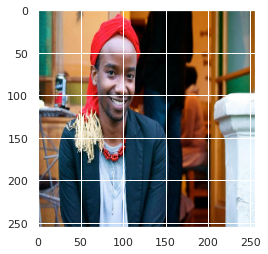

In [17]:
sns.set()
plt.imshow(X_train[0])

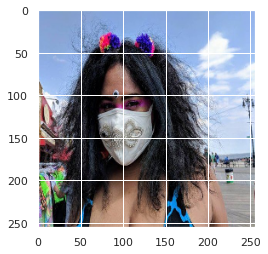

In [18]:
plt.imshow(X_train[90])

In [19]:
#create y_train
Y_train = df['target'].tolist()
resize=True
if resize:
  import time
  start_time = time.time()
  X_train = np.array([np.array(image) for image in X_train])
  Y_train = np.array([np.array(image) for image in Y_train])
  print("--- %s seconds ---" % (time.time() - start_time))
Y_train.shape

--- 0.22806310653686523 seconds ---


(1308,)

In [0]:
# #split dataset into test & train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train, test_size=0.3,random_state=100)

In [0]:
def normalize_images(train_images_, test_images_):
	# convert from integers to floats
	train_norm = train_images_.astype('float32')
	test_norm = test_images_.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [22]:
#LoadData, Encode Labels and Normalize

train_labels_encoded = tf.keras.utils.to_categorical(y_train)
test_labels_encoded = tf.keras.utils.to_categorical(y_test)


train_images, test_images = normalize_images(x_train, x_test)
category_size=train_labels_encoded.shape[1]
print('Phase 1/5: DataLoaded, Encoded And Normalized')



Phase 1/5: DataLoaded, Encoded And Normalized


In [23]:
train_images.shape

(915, 256, 256, 3)

In [24]:
print("we have {} classes".format(category_size))
print("the shape of X_train, y_train) is ")
print(X_train.shape, y_train.shape)

we have 2 classes
the shape of X_train, y_train) is 
(1308, 256, 256, 3) (915,)


In [0]:
input_shape=train_images[0].shape

#### Create a basic model made of a convolutional bloc (e.g., at least one convolutional layer followed by a maxpooling layer)
def conv_block(filter_size_, kernel_size_, max_pooling_size_, activation_type_=None, input_shape_=None): 
  model_ = tf.keras.Sequential()
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_, kernel_size=kernel_size_, activation=activation_type_, input_shape=input_shape_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.BatchNormalization())
  model_.add(tf.keras.layers.MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Dropout(0.2))

  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*2, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*2, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.BatchNormalization())
  model_.add(tf.keras.layers.MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Dropout(0.3))

  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*4, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*4, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*4, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.BatchNormalization())
  model_.add(tf.keras.layers.MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Dropout(0.4))


  return model_

#### Instanciate your model (if you build a function to create your model)
base_model = conv_block(32, (3, 3), (2, 2), activation_type_='relu', input_shape_=input_shape)


In [0]:
top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.Dense(1024, activation='relu'))
top_layers.add(tf.keras.layers.Dense(512, activation='relu'))
top_layers.add(tf.keras.layers.Dense(128, activation='relu'))
top_layers.add(tf.keras.layers.Dense(32, activation='relu'))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([
    base_model, 
    top_layers
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 128)       435488    
_________________________________________________________________
sequential_1 (Sequential)    (None, 2)                 134813410 
Total params: 135,248,898
Trainable params: 135,248,450
Non-trainable params: 448
_________________________________________________________________


In [0]:
#### Compile your model (use SGD optimizer and choose a relevant loss and metric)
opt = tf.keras.optimizers.SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
augment_data=True
if augment_data:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)

In [30]:
#### Fit your model (you can use the test set as your validation data)
epochs = 80
if augment_data:
  print("Training with Augmented Data")
  steps = int(train_images.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, 
                      epochs=epochs, 
                      validation_data=(test_images, test_labels_encoded), verbose=1)
else: 
  print("Training without Augmented Data")
  history = model.fit(train_images, train_labels_encoded,
                      epochs=epochs, batch_size=64, 
                      validation_data=(test_images, test_labels_encoded))




Training with Augmented Data
Epoch 1/80
14/14 [==============================] - 11s 775ms/step - loss: 0.8978 - accuracy: 0.4994 - val_loss: 0.7021 - val_accuracy: 0.4962
Epoch 2/80
14/14 [==============================] - 10s 744ms/step - loss: 0.6805 - accuracy: 0.5805 - val_loss: 0.7811 - val_accuracy: 0.4962
Epoch 3/80
14/14 [==============================] - 11s 751ms/step - loss: 0.6453 - accuracy: 0.6263 - val_loss: 0.9469 - val_accuracy: 0.4962
Epoch 4/80
14/14 [==============================] - 10s 749ms/step - loss: 0.6442 - accuracy: 0.6663 - val_loss: 1.1060 - val_accuracy: 0.4962
Epoch 5/80
14/14 [==============================] - 10s 749ms/step - loss: 0.6168 - accuracy: 0.6345 - val_loss: 1.2948 - val_accuracy: 0.4962
Epoch 6/80
14/14 [==============================] - 10s 749ms/step - loss: 0.6611 - accuracy: 0.6146 - val_loss: 1.5664 - val_accuracy: 0.4962
Epoch 7/80
14/14 [==============================] - 10s 743ms/step - loss: 0.6340 - accuracy: 0.6580 - val_loss: 

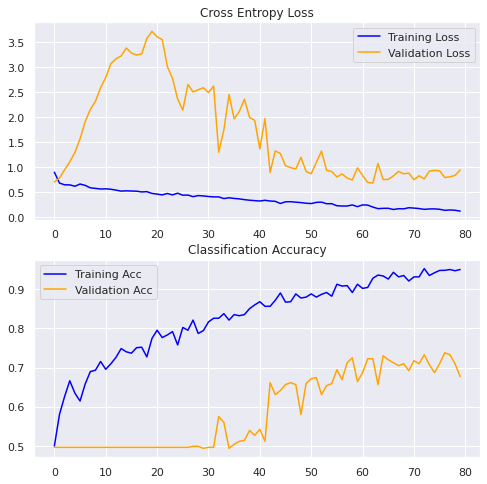

In [31]:
##### Display the loss and metric curves  
def accuracy_lost_curves(history):
  # plot loss
  fig = plt.figure(figsize=(8,8))
  ax1 = fig.add_subplot(2,1,1)
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='orange', label='test')
  ax1.set_title('Cross Entropy Loss')
  ax1.legend(['Training Loss', 'Validation Loss'])
	# plot accuracy
  ax2 = fig.add_subplot(2,1,2)
  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='orange', label='test')
  ax2.set_title('Classification Accuracy')
  ax2.legend(['Training Acc', 'Validation Acc'])
  
# Learning curves
accuracy_lost_curves(history)

# Evaluating a model based on transfer learning

in this section we will go thrue multiple CNN architectures with transfert learning 

## VGG19

In [32]:
base_model = tf.keras.applications.VGG19(weights = 'imagenet',
                                         include_top = False, 
                                         input_shape=input_shape)
base_model.trainable = True

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.GlobalAveragePooling2D())
#top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.Dense(128, activation='relu'))
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.9))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([
    base_model, 
    top_layers
])

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.0009, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
augment_data=True
if augment_data:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)


epochs = 80
if augment_data:
  print("Training with Augmented Data")
  steps = int(train_images.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels_encoded), verbose=1)
else: 
  print("Training withOUT Augmented Data")
  history = model.fit(train_images, train_labels_encoded, epochs=epochs, batch_size=64, 
                    validation_data=(test_images, test_labels_encoded))

Training with Augmented Data
Epoch 1/80
14/14 [==============================] - 15s 1s/step - loss: 1.4076 - accuracy: 0.4947 - val_loss: 0.6838 - val_accuracy: 0.5623
Epoch 2/80
14/14 [==============================] - 14s 989ms/step - loss: 1.1326 - accuracy: 0.5300 - val_loss: 0.7266 - val_accuracy: 0.4962
Epoch 3/80
14/14 [==============================] - 14s 990ms/step - loss: 1.0456 - accuracy: 0.5535 - val_loss: 5.2049 - val_accuracy: 0.4962
Epoch 4/80
14/14 [==============================] - 14s 982ms/step - loss: 1.1444 - accuracy: 0.5112 - val_loss: 7.7117 - val_accuracy: 0.4962
Epoch 5/80
14/14 [==============================] - 14s 988ms/step - loss: 1.0297 - accuracy: 0.5253 - val_loss: 7.7271 - val_accuracy: 0.4962
Epoch 6/80
14/14 [==============================] - 14s 992ms/step - loss: 0.8783 - accuracy: 0.5558 - val_loss: 7.6796 - val_accuracy: 0.4962
Epoch 7/80
14/14 [==============================] - 14s 994ms/step - loss: 0.7915 - accuracy: 0.5687 - val_loss: 6.5

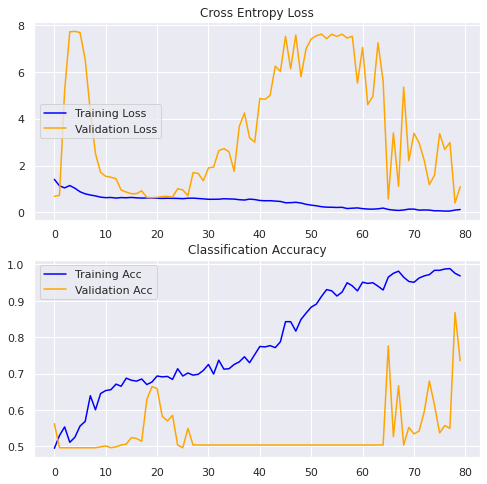

In [36]:
accuracy_lost_curves(history)

## Inception V3


In [37]:
base_model = tf.keras.applications.InceptionV3(weights = 'imagenet', 
                                               include_top = False,
                                               input_shape=input_shape)
base_model.trainable = True

top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.5))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([
    base_model, 
    top_layers
])
opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

augment_data=True
if augment_data:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, 
                                                            rotation_range=30,
                                                            zoom_range=0.3,
                                                            height_shift_range=0.2, 
                                                            horizontal_flip=True)
  it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)
  #### Fit your model (you can use the test set as your validation data)
epochs = 120
if augment_data:
  print("Training with Augmented Data")
  steps = int(train_images.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels_encoded), verbose=1)
else: 
  print("Training withOUT Augmented Data")
  history = model.fit(train_images, train_labels_encoded, epochs=epochs, batch_size=64, 
                    validation_data=(test_images, test_labels_encoded))

87916544/87910968 [==============================] - 1s 0us/step
Training with Augmented Data
Epoch 1/120
14/14 [==============================] - 14s 972ms/step - loss: 1.6103 - accuracy: 0.7485 - val_loss: 7.0844 - val_accuracy: 0.5064
Epoch 2/120
14/14 [==============================] - 12s 842ms/step - loss: 5.2801 - accuracy: 0.6240 - val_loss: 7.7271 - val_accuracy: 0.4962
Epoch 3/120
14/14 [==============================] - 12s 846ms/step - loss: 6.6925 - accuracy: 0.5170 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 4/120
14/14 [==============================] - 12s 838ms/step - loss: 7.4849 - accuracy: 0.4900 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 5/120
14/14 [==============================] - 12s 842ms/step - loss: 7.3263 - accuracy: 0.5194 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 6/120
14/14 [==============================] - 12s 841ms/step - loss: 7.5212 - accuracy: 0.5076 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 7/120
14/14 [=======================

In [38]:
model.evaluate(test_images, test_labels_encoded)

13/13 [==============================] - 1s 56ms/step - loss: 1.5452 - accuracy: 0.5038


[1.5452320575714111, 0.5038167834281921]

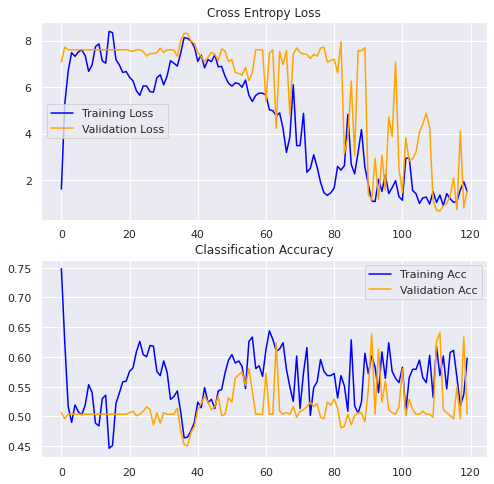

In [39]:
accuracy_lost_curves(history)

## InceptionResNetV2


In [40]:
model.evaluate(test_images, test_labels_encoded)

13/13 [==============================] - 1s 57ms/step - loss: 1.5452 - accuracy: 0.5038


[1.5452320575714111, 0.5038167834281921]

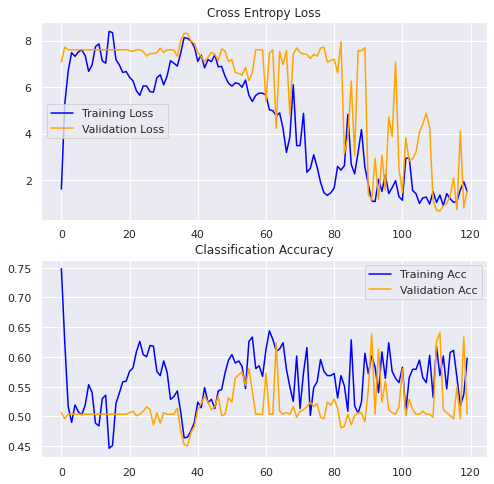

In [41]:
accuracy_lost_curves(history)

# Resnet50

In [42]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', 
                                            include_top = False,
                                            input_shape=input_shape)
base_model.trainable = True

top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.5))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([
    base_model, 
    top_layers
])
opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

augment_data=True
if augment_data:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, rotation_range=30, zoom_range=0.3, height_shift_range=0.2, horizontal_flip=True)
  it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)
  #### Fit your model (you can use the test set as your validation data)
epochs = 80
if augment_data:
  print("Training with Augmented Data")
  steps = int(train_images.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels_encoded), verbose=1)
else: 
  print("Training withOUT Augmented Data")
  history = model.fit(train_images, train_labels_encoded, epochs=epochs, batch_size=64, 
                    validation_data=(test_images, test_labels_encoded))

94773248/94765736 [==============================] - 1s 0us/step
Training with Augmented Data
Epoch 1/80
14/14 [==============================] - 13s 962ms/step - loss: 2.4198 - accuracy: 0.6863 - val_loss: 7.3217 - val_accuracy: 0.5038
Epoch 2/80
14/14 [==============================] - 13s 953ms/step - loss: 4.1433 - accuracy: 0.6204 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 3/80
14/14 [==============================] - 13s 895ms/step - loss: 4.2109 - accuracy: 0.5746 - val_loss: 7.7271 - val_accuracy: 0.4962
Epoch 4/80
14/14 [==============================] - 12s 883ms/step - loss: 4.8096 - accuracy: 0.5746 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 5/80
14/14 [==============================] - 12s 884ms/step - loss: 5.6444 - accuracy: 0.5499 - val_loss: 7.7271 - val_accuracy: 0.4962
Epoch 6/80
14/14 [==============================] - 12s 888ms/step - loss: 5.1203 - accuracy: 0.5452 - val_loss: 7.6100 - val_accuracy: 0.5038
Epoch 7/80
14/14 [==============================

In [43]:
model.evaluate(test_images, test_labels_encoded)

13/13 [==============================] - 1s 65ms/step - loss: 5.3892 - accuracy: 0.5242


[5.389191627502441, 0.5241730213165283]

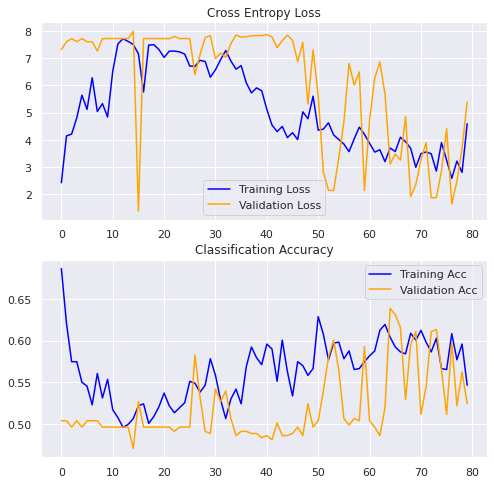

In [44]:
accuracy_lost_curves(history)

# Xception 



In [45]:
base_model = tf.keras.applications.Xception(weights = 'imagenet', 
                                            include_top = False, 
                                            input_shape=input_shape)
base_model.trainable = True

top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.5))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([
    base_model, 
    top_layers
])


83689472/83683744 [==============================] - 1s 0us/step


In [0]:
opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
#(lr=0.005, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [0]:

augment_data=True
if augment_data:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2,
                                                            rotation_range=30,
                                                            zoom_range=0.3, 
                                                            height_shift_range=0.2, 
                                                            horizontal_flip=True)
  
  it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)
  #### Fit your model (you can use the test set as your validation data)


In [48]:
epochs = 80
if augment_data:
  print("Training with Augmented Data")
  steps = int(train_images.shape[0] / 64)
  history = model.fit(it_train, 
                      steps_per_epoch=steps, 
                      epochs=epochs, 
                      validation_data=(test_images, test_labels_encoded))
else: 
  print("Training withOUT Augmented Data")
  history = model.fit(train_images, train_labels_encoded, 
                      epochs=epochs, batch_size=64, 
                    validation_data=(test_images, test_labels_encoded))

Training with Augmented Data
Epoch 1/80
14/14 [==============================] - 17s 1s/step - loss: 1.6814 - accuracy: 0.7897 - val_loss: 0.8055 - val_accuracy: 0.9389
Epoch 2/80
14/14 [==============================] - 16s 1s/step - loss: 1.8226 - accuracy: 0.8566 - val_loss: 1.5350 - val_accuracy: 0.8804
Epoch 3/80
14/14 [==============================] - 16s 1s/step - loss: 2.6489 - accuracy: 0.8108 - val_loss: 7.7203 - val_accuracy: 0.4962
Epoch 4/80
14/14 [==============================] - 16s 1s/step - loss: 4.0834 - accuracy: 0.6886 - val_loss: 7.7271 - val_accuracy: 0.4962
Epoch 5/80
14/14 [==============================] - 16s 1s/step - loss: 1.3661 - accuracy: 0.4794 - val_loss: 7.0246 - val_accuracy: 0.5420
Epoch 6/80
14/14 [==============================] - 16s 1s/step - loss: 0.7774 - accuracy: 0.5006 - val_loss: 7.6881 - val_accuracy: 0.4987
Epoch 7/80
14/14 [==============================] - 16s 1s/step - loss: 0.7563 - accuracy: 0.5065 - val_loss: 7.3368 - val_accuracy

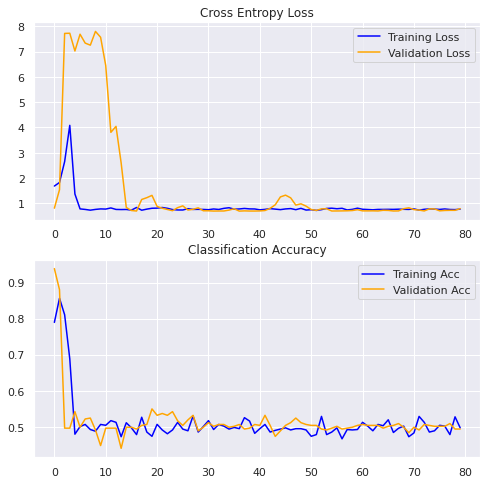

In [56]:
accuracy_lost_curves(history)

In [0]:
model.save_weights('maskDetection_bestModel.h5')
model.save('maskDetection_bestModel.h5')

# Conclusion & link to github

link to my git repository : https://github.com/amenallah-salem/mask-detection-challege-